In [1]:
data_folder = '..\\data_analysis\\data_analysis'

In [7]:
# needed to use modules/scripts from parent folder
import os,sys
print(sys.version)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import json
import os
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d import Axes3D

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]


In [8]:
subjects_folders = [os.path.join(data_folder, o) for o in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder,o)) and 'final' in o and 'leap2' not in o]

In [9]:
maneuvers = ['Left','Right','up','down','forward','backward','contract','expand']

In [10]:
files_man = {}
for i,maneuver in enumerate(maneuvers):
    files_man[maneuver] = []
    for folder in subjects_folders:
        files_man[maneuver].append([os.path.join(folder, o) for o in os.listdir(folder) if os.path.isfile(os.path.join(folder,o)) and maneuver in o and 'CLEAN' not in o])

At this point we have a dictionary containing, for each maneuver, all the file names corresponding to this maneuver for the subjects.

In [11]:
file_test = files_man[maneuvers[1]][0][0]
print(file_test)
#file_test = file_test[:-4] # To remove the .txt

..\data_analysis\data_analysis\final_10_leap\Right_period_20_amplitude_100_inst_1_2020_Aug_22_06_19_26PM.csv.txt


In [12]:
def get_position_signals(file):
    data_test = pd.read_csv(file)
    list_position = ['pos_{}_{}_{}'.format(x,hand,bone) for x in ['x','y','z'] for hand in [1,2] for bone in [1,4,8,12,16,20]]
    positions_signals = data_test[list_position]
    #print(np.shape(positions_signals))
    N = len(data_test['pos_x_1_1'])
    return(positions_signals)

In [13]:
def plot_position_hands(positions_signals,n,man):
    color = ['r','b']
    label_hand = ['Right Hand', 'Left Hand']
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for hand in [1,2]:
        for bone in [1,4,8,12,16,20]:
            if bone ==1:
                label_sel = label_hand[hand-1]
            else:
                label_sel = ''
            ax.plot(positions_signals['pos_x_{}_{}'.format(hand,bone)].values,positions_signals['pos_z_{}_{}'.format(hand,bone)].values,positions_signals['pos_y_{}_{}'.format(hand,bone)].values,color[hand-1],label = label_sel)
    ax.set_xlim(-250,250)
    ax.set_ylim(-250,250)
    ax.set_zlim(0,400)
    plt.title('Subject {}: {} maneuver'.format(n,man))
    plt.legend()
    plt.show()

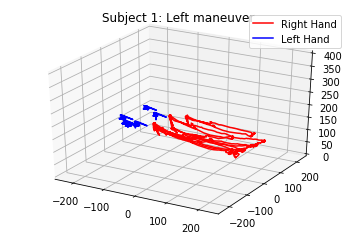

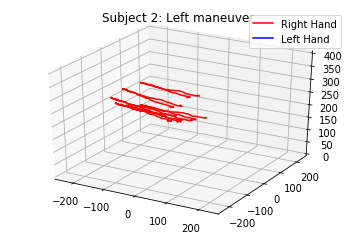

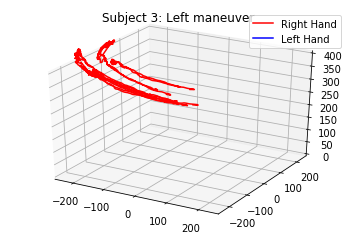

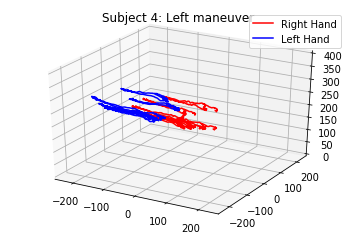

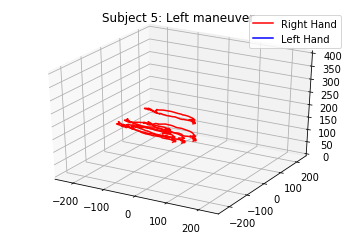

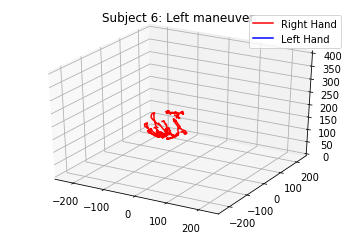

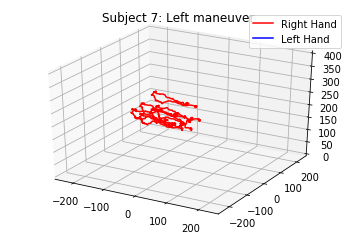

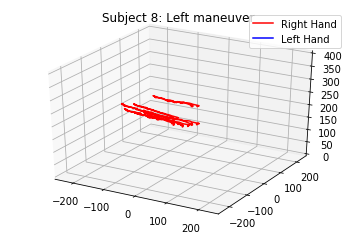

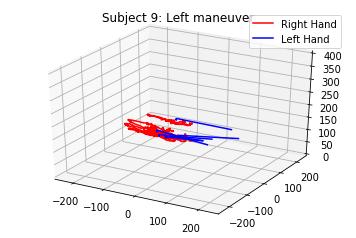

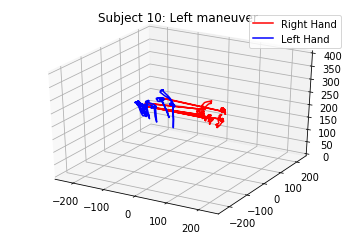

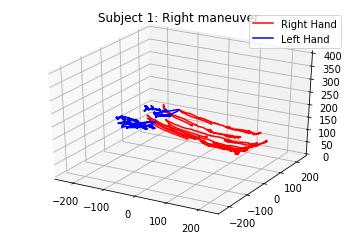

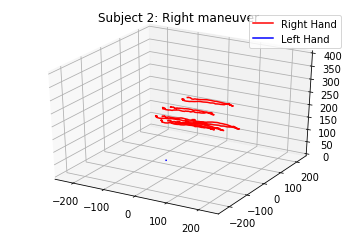

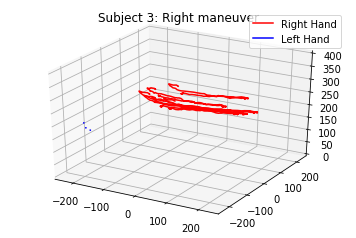

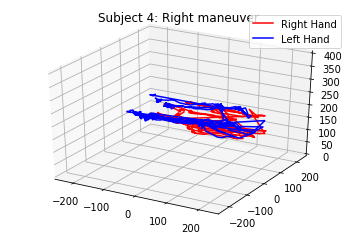

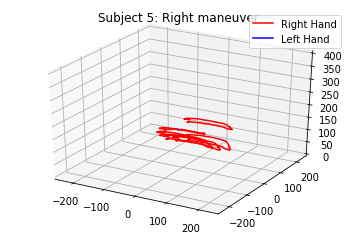

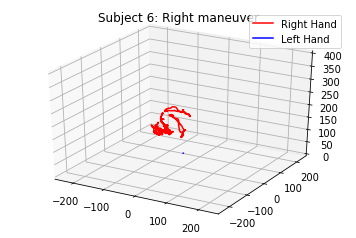

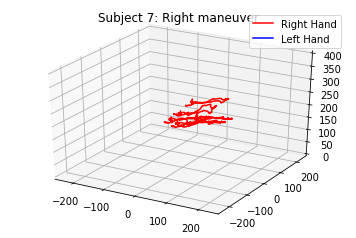

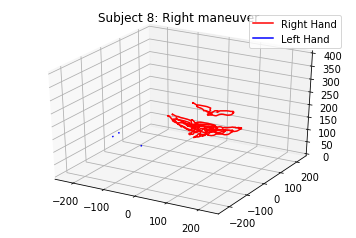

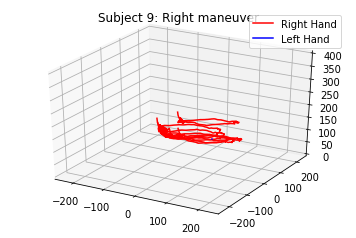

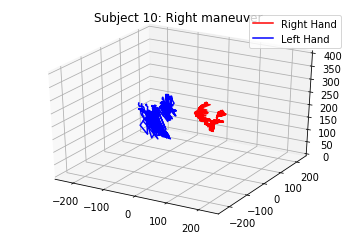

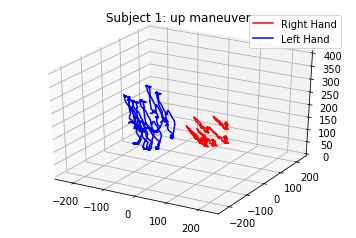

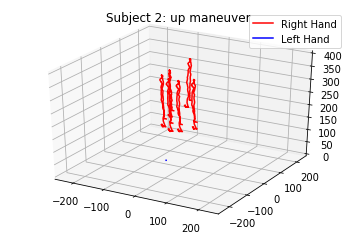

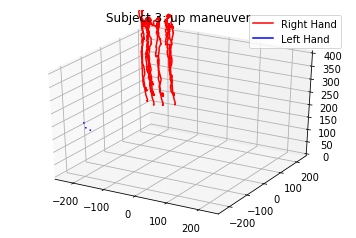

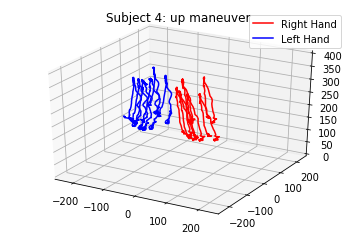

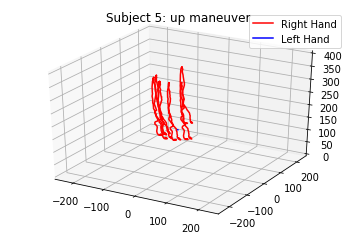

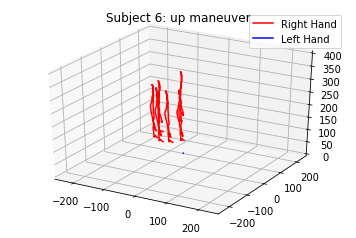

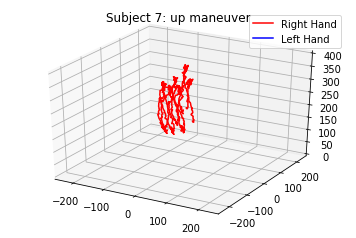

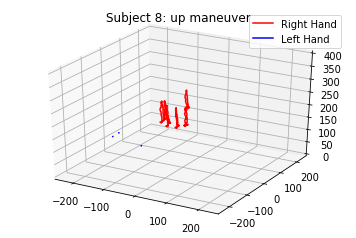

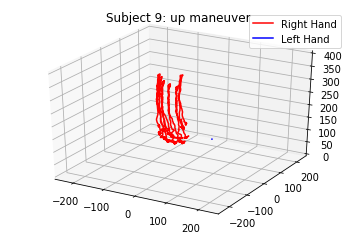

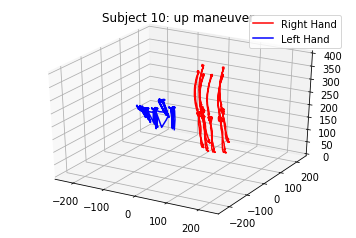

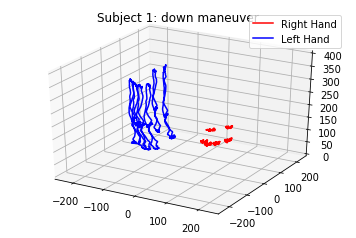

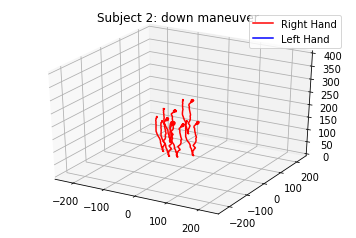

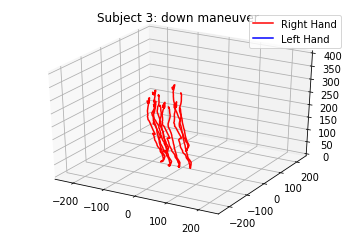

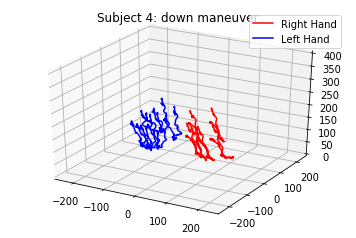

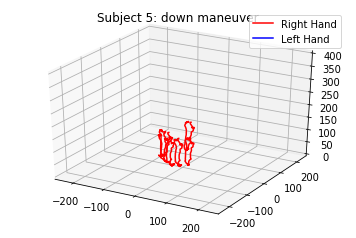

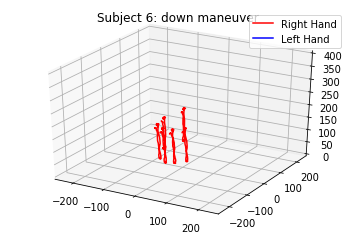

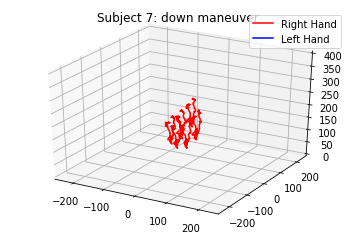

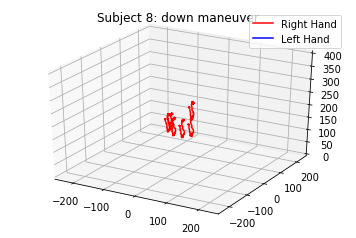

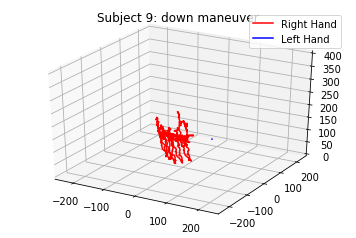

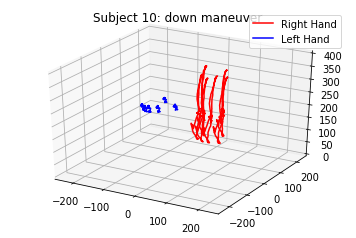

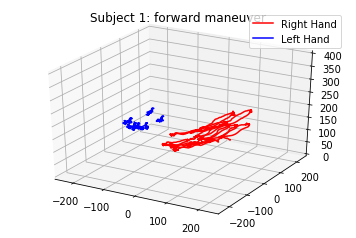

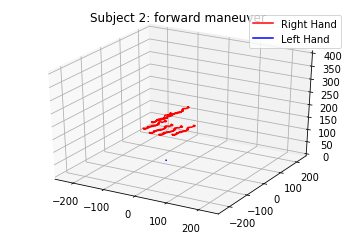

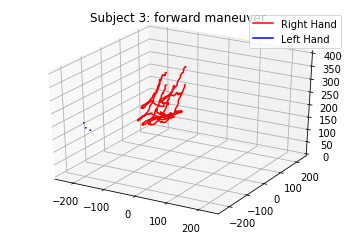

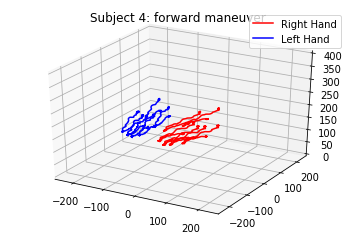

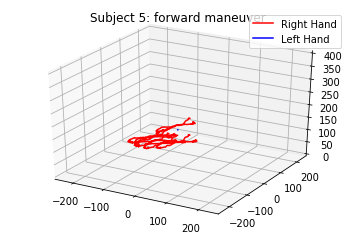

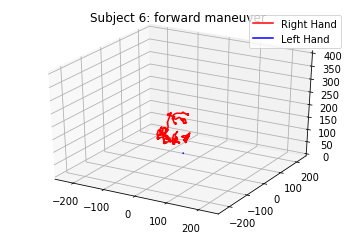

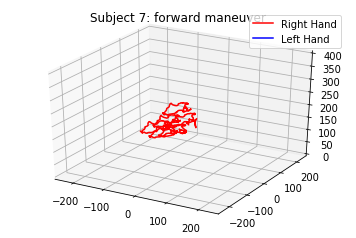

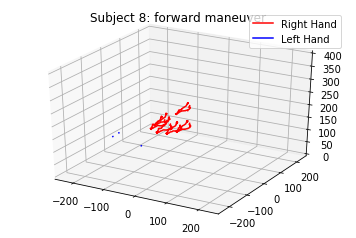

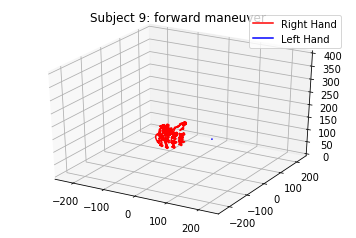

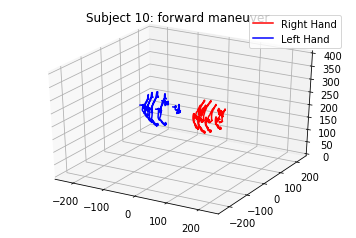

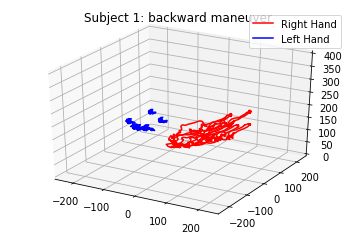

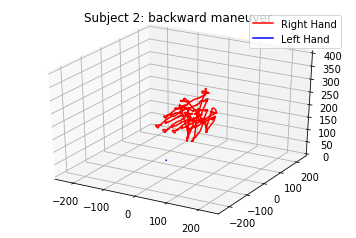

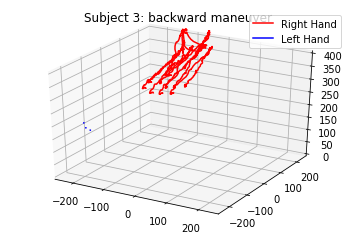

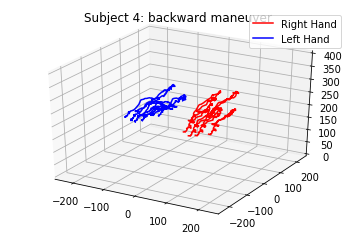

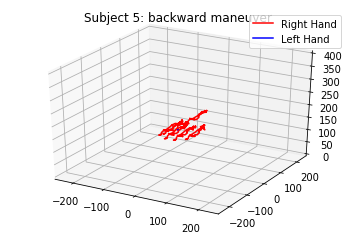

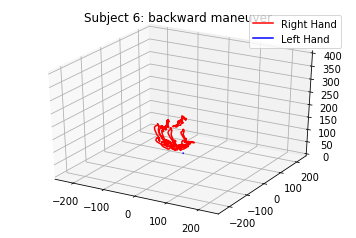

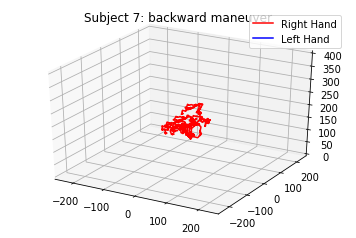

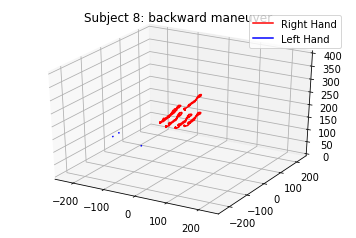

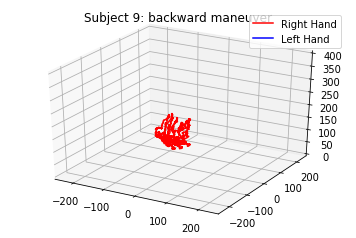

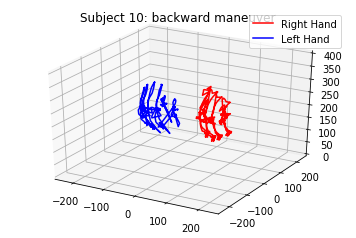

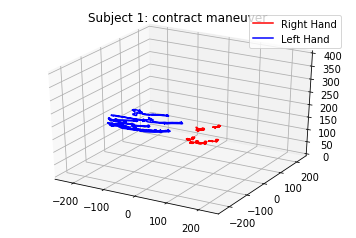

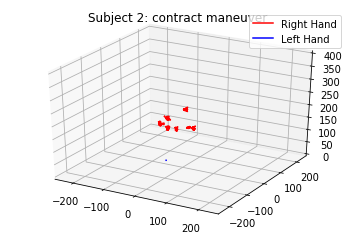

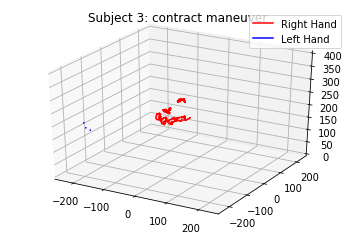

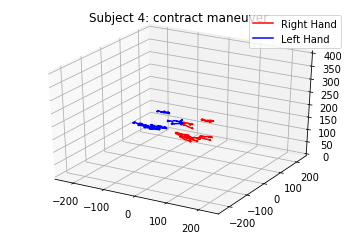

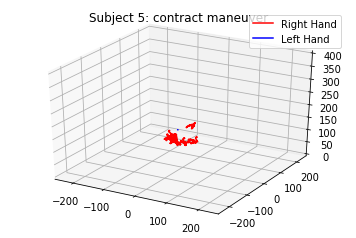

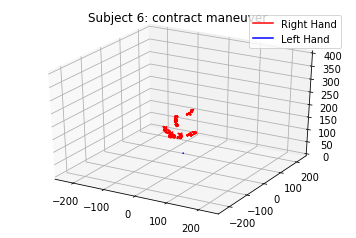

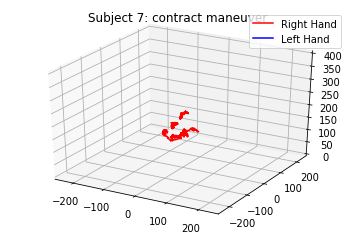

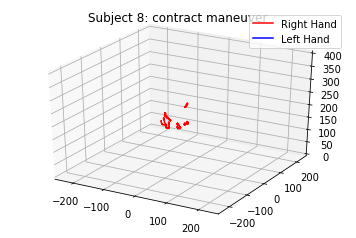

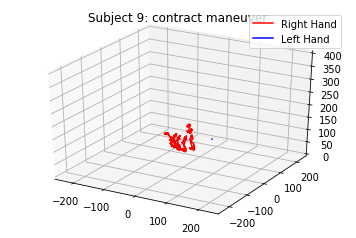

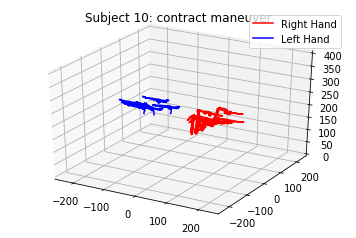

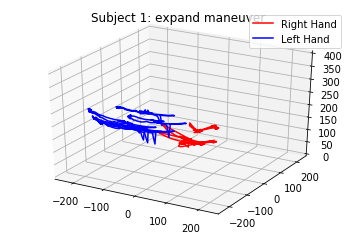

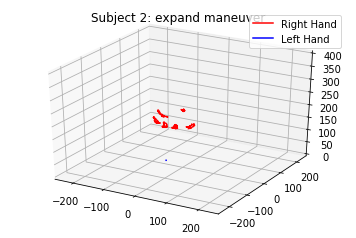

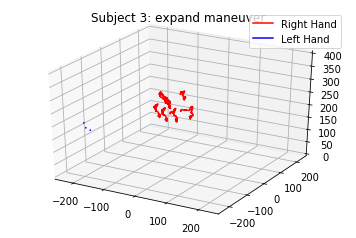

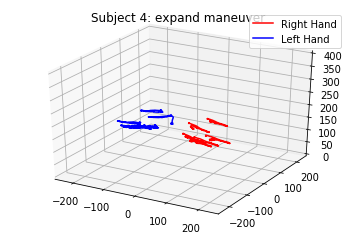

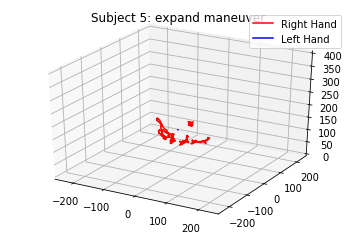

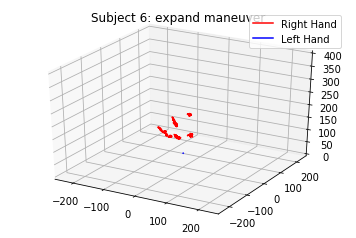

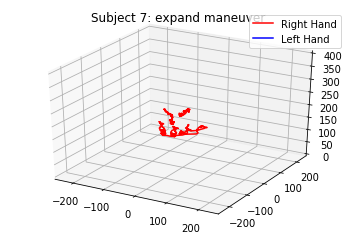

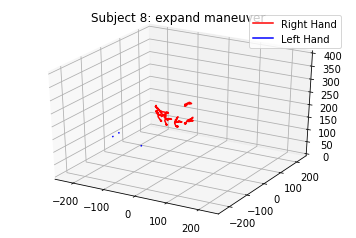

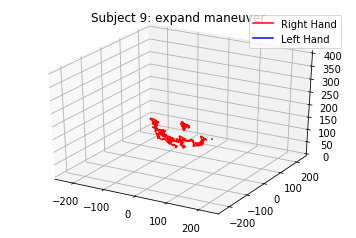

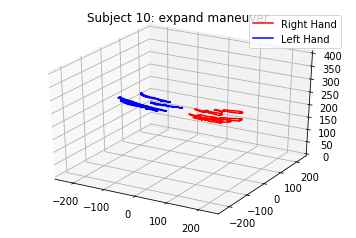

In [14]:
for j in range(8):
    for i in range(10):
        file = files_man[maneuvers[j]][i][0]
        positions_signals = get_position_signals(file)
        plot_position_hands(positions_signals,i+1,maneuvers[j])